In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("diamonds")
print(df)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


In [36]:
# To see if have nulls do info()
df.info()
# don't has nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


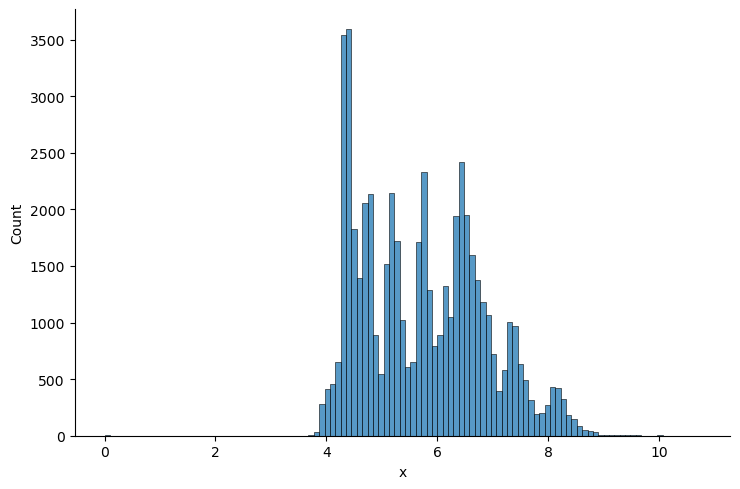

In [37]:
# make an histogram
# go to seaborn and check one
# go to Distribution Tutorial -> there you can see the displot 
sns.displot(df, x="x", aspect=1.5)
# only see the x column

In [38]:
# We can check the min and the max with describe() to check outliers
df["x"].describe()

count    53940.000000
mean         5.731157
std          1.121761
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

<Axes: xlabel='x'>

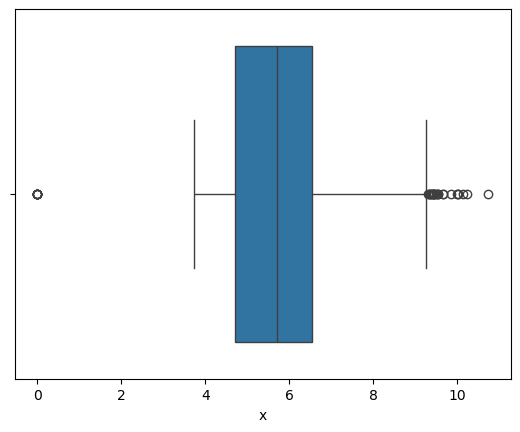

In [39]:
# Create bloxplot
sns.boxplot(x = df["x"])

In [40]:
df_clean = df.copy()

zeros = df[df["x"]==0]
zeros

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [41]:
df_clean.drop(index=zeros.index, inplace=True);


In [42]:
zeros = df_clean[df_clean["x"]==0]
zeros

,carat,cut,color,clarity,depth,table,price,x,y,z


In [43]:
df_clean = df.copy()

zeros_xyz = df[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)]

df_clean.drop(index=zeros_xyz.index, inplace=True);


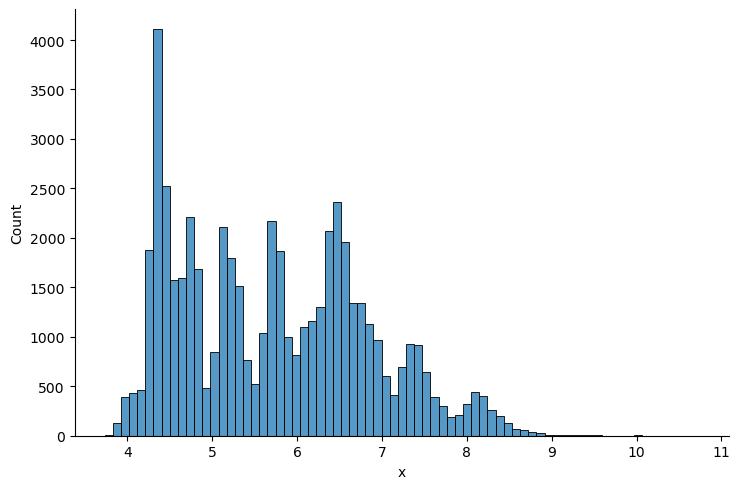

In [44]:
# we have deleted the 0 
sns.displot(df_clean, x="x", aspect=1.5)

In [46]:
# the the values of this columns: carat, depth, table and price  
df_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53920 non-null  float64 
 1   cut      53920 non-null  category
 2   color    53920 non-null  category
 3   clarity  53920 non-null  category
 4   depth    53920 non-null  float64 
 5   table    53920 non-null  float64 
 6   price    53920 non-null  int64   
 7   x        53920 non-null  float64 
 8   y        53920 non-null  float64 
 9   z        53920 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.4 MB


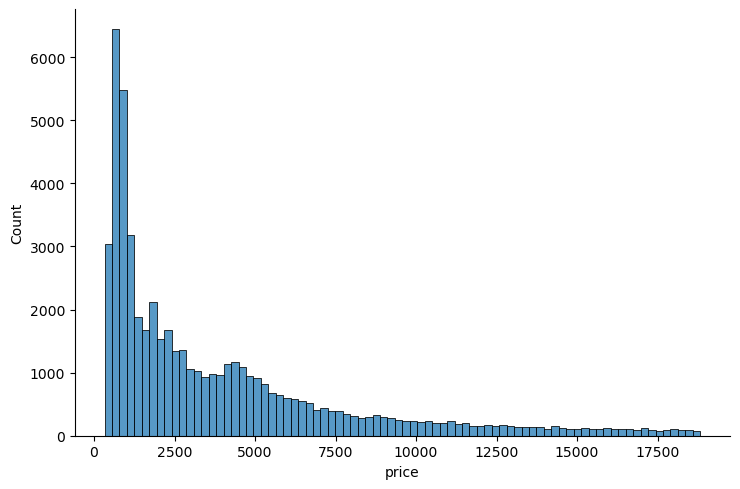

In [47]:
sns.displot(df, x="price", aspect=1.5)

<Axes: xlabel='price'>

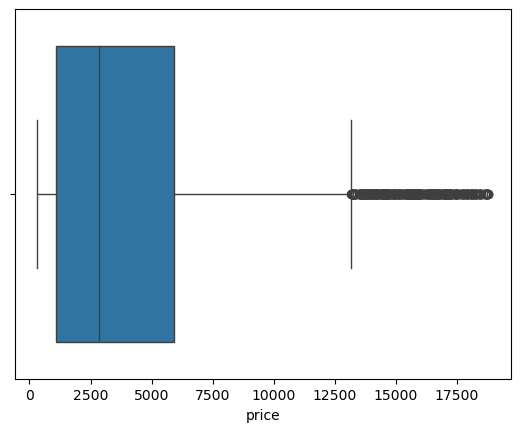

In [59]:
sns.boxplot(x = df_clean["price"])

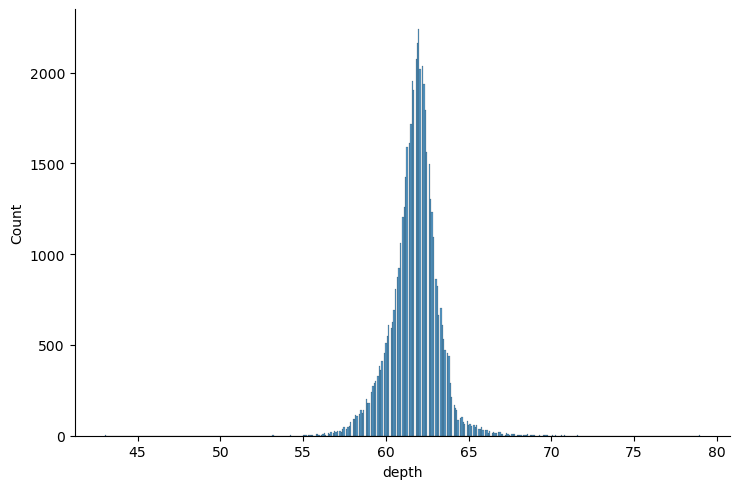

In [48]:
sns.displot(df, x="depth", aspect=1.5)

In [49]:
df_clean["depth"].describe()

count    53920.000000
mean        61.749514
std          1.432331
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

<Axes: xlabel='depth'>

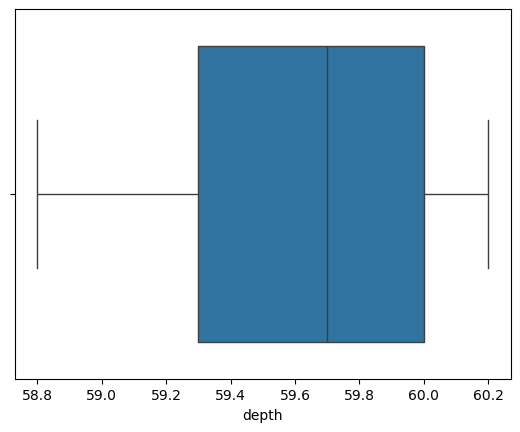

In [54]:
sns.boxplot(x = df_clean["depth"])

In [51]:
Q1 = df["depth"].quantile(0.25)
Q3 = df["depth"].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR


df_clean = df_clean[(df_clean["depth"] >= lower_bound) & (df_clean["depth"] <= upper_bound)]


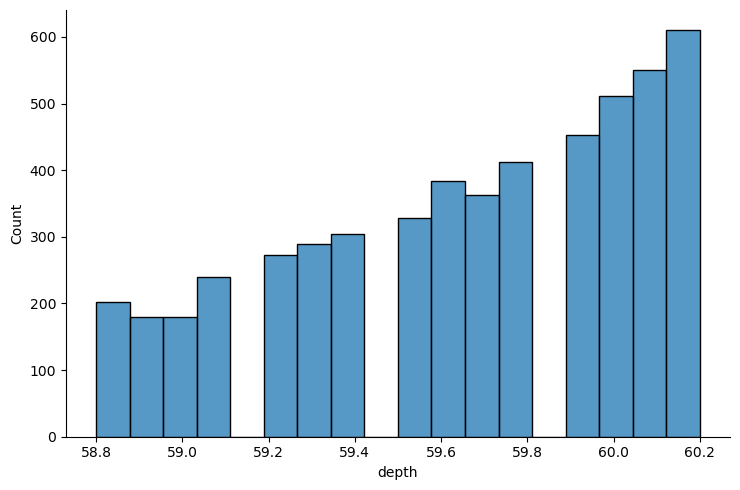

In [61]:
sns.displot(df_clean, x="depth", aspect=1.5)